In [1]:
from __future__ import division
import numpy as np
from numpy import pi, exp, sin, cos, log, real
from scipy.integrate import dblquad
from functools import lru_cache

from enterprise.signals.parameter import function

 
import matplotlib.pyplot as plt
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels

plt.rcParams.update({'font.size': 15})

In [2]:
xi0, theta0, phi0 = pi/5, pi/3, pi/4
L10, L20, f0 = 100, 100, 1/10 

In [3]:
# @lru_cache(maxsize=None)
# @lru_cache(maxsize=10**7)
def e_factor(xi, L1, L2, f, theta, phi):
    phase1 = 2j*f*L1*pi*(1.0 + cos(theta))
    phase2 = -2j*f*L2*pi*(1.0 + cos(theta)*cos(xi) + cos(phi)*sin(theta)*sin(xi))
    temp1 = -1.0 + exp(phase1)
    temp2 = -1.0 + exp(phase2)
    return  real(temp1*temp2)

%time e_factor(xi0, L10, L20, 100, theta0, phi0)

CPU times: user 55 µs, sys: 6 µs, total: 61 µs
Wall time: 64.6 µs


1.811449160776493e-13

## TT (+&×) Polarization

In [4]:
# @lru_cache(maxsize=None)
def GammaTT0(xi, theta, phi):
    return 3.0/8.0/pi * (sin(theta/2.0)**2.0 * sin(theta) * (
        (cos(xi)*sin(theta) - cos(theta)*cos(phi)*sin(xi))**2.0 
        - sin(xi)**2.0 * sin(phi)**2.0)
     )/(1.0 + cos(theta)*cos(xi) + cos(phi)*sin(theta)*sin(xi))


%time GammaTT0(xi0, theta0, phi0)

CPU times: user 39 µs, sys: 5 µs, total: 44 µs
Wall time: 46.3 µs


0.0010270566287711445

In [5]:
# Correlation functions
# @lru_cache(maxsize=None)
# @function
def GammaTT(xi, L1, L2, f):
    integral = lambda theta, phi: GammaTT0(xi, theta, phi)*e_factor(xi, L1, L2, f, theta, phi)
#     dblquad(f, 0, 2, lambda x: 0, lambda x: 1)
    return dblquad(integral, 0.0, 2*pi, 0.0, pi, epsrel=1e-3, epsabs=1e-3)[0]

# %time GammaTT(xi0, L10, L20, f0)
%time GammaTT(pi/2.001, L10, L20, f0)

CPU times: user 9.13 s, sys: 4.25 ms, total: 9.14 s
Wall time: 9.16 s


-0.28671608922526753

In [6]:
%time GammaTT(pi/10, 1, 1, 75)

/home/bear/opt/miniconda3/envs/PTAPolar3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:860: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  **opt)


CPU times: user 1min 29s, sys: 114 µs, total: 1min 29s
Wall time: 1min 29s


/home/bear/opt/miniconda3/envs/PTAPolar3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:860: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  **opt)


0.7169306409542285

In [7]:
%time GammaTT(pi/10, 1, 2, 75)

CPU times: user 1min 40s, sys: 6.64 ms, total: 1min 40s
Wall time: 1min 40s


0.7402889237882798

In [8]:
%time GammaTT(pi/10, 1, 5, 75)

CPU times: user 1min 40s, sys: 3.32 ms, total: 1min 40s
Wall time: 1min 40s


0.7500967169126924

In [9]:
(0.750096-0.734100)/0.734100

0.021789946873722942

In [10]:
%time GammaTT(pi/2.001, L10, L20, 3)

CPU times: user 1min 40s, sys: 6.66 ms, total: 1min 40s
Wall time: 1min 40s


-0.2589568960997308

In [11]:
# Analytical version of GammaTT
def GammaTTA(xi, L1, L2, f):
    k = (1-cos(xi))/2
    return 3*(1/3 + k*(log(k)-1/6))

GammaTTA(pi/3, L10, L20, f0)

-0.16472077083991787

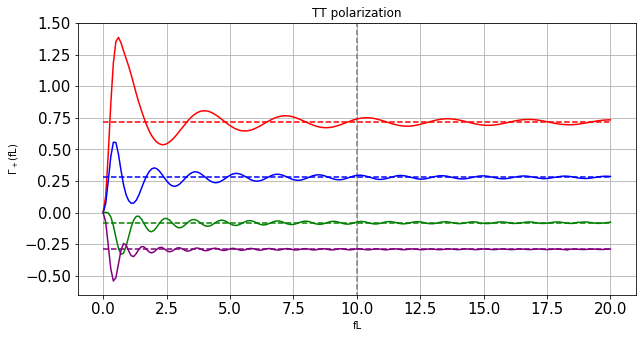

CPU times: user 1h 3min 21s, sys: 215 ms, total: 1h 3min 21s
Wall time: 1h 3min 24s


In [12]:
%%time
fs = np.linspace(0, 20, 200)
Gammas1 = np.array([GammaTT(pi/10, 1, 1, f) for f in fs])
Gammas2 = np.array([GammaTT(pi/5, 1, 1, f) for f in fs])
Gammas3 = np.array([GammaTT(3*pi/10, 1, 1, f) for f in fs])
Gammas4 = np.array([GammaTT(pi/2.001, 1, 1, f) for f in fs])

Gammas5 = np.array([GammaTTA(pi/10, 1, 1, f) for f in fs])
Gammas6 = np.array([GammaTTA(pi/5, 1, 1, f) for f in fs])
Gammas7 = np.array([GammaTTA(3*pi/10, 1, 1, f) for f in fs])
Gammas8 = np.array([GammaTTA(pi/2, 1, 1, f) for f in fs])

plt.figure(figsize=(10, 5))
plt.plot(fs, Gammas1, "red", label=r"$\xi=\pi/10$")
plt.plot(fs, Gammas2, "b", label=r"$\xi=\pi/5$")
plt.plot(fs, Gammas3, "g", label=r"$\xi=3\pi/10$")
plt.plot(fs, Gammas4, "purple", label=r"$\xi=\pi/2$")
plt.plot(fs, Gammas5, "r--")
plt.plot(fs, Gammas6, "b--")
plt.plot(fs, Gammas7, "g--")
plt.plot(fs, Gammas8, "--", color="purple")

plt.xlabel("fL")
plt.ylabel(r"$\Gamma_+$(fL)")
plt.title("TT polarization")
plt.ylim(-0.65, 1.5)
plt.vlines(10, ymin=-1e3, ymax=1e3, linestyles='--', colors='gray')
plt.grid("on")
# plt.legend()
plt.show()

## ST (b) Polarization

In [13]:
# @lru_cache(maxsize=None)
def GammaST0(xi, theta, phi):
    return -3.0/8.0/pi * (sin(theta/2.0))**2.0 * sin(theta) * (
        -1 + cos(theta)*cos(xi) + cos(phi)*sin(theta)*sin(xi)
    )
GammaST0(xi0, theta0, phi0)

0.006087395043300234

In [14]:
# @lru_cache(maxsize=None)
# @function
def GammaST(xi, L1, L2, f):
    integral = lambda theta, phi: GammaST0(xi, theta, phi)*e_factor(xi, L1, L2, f, theta, phi)
    return dblquad(integral, 0.0, 2*pi, 0.0, pi, epsrel=1e-3, epsabs=1e-3)[0]

%time GammaST(xi0, L10, L20, f0)

CPU times: user 2.26 s, sys: 3.33 ms, total: 2.26 s
Wall time: 2.26 s


0.9672440097016415

In [15]:
# Analytical version of GammaST
def GammaSTA(xi, L1, L2, f):
    return 1/4 * (3 + cos(xi))

GammaSTA(xi0, L10, L20, f0)

0.9522542485937369

In [16]:
%time GammaST(pi/6, 1, 1, 2)

CPU times: user 161 ms, sys: 0 ns, total: 161 ms
Wall time: 160 ms


0.9558921685835213

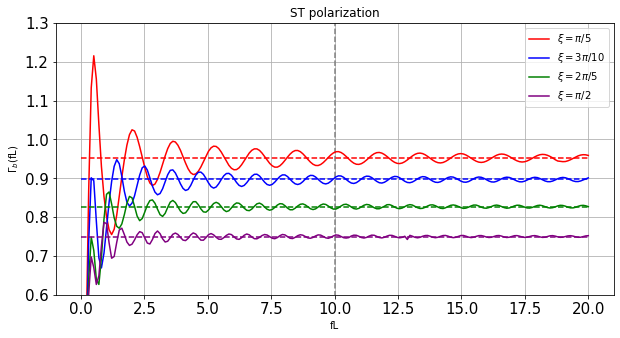

CPU times: user 56min 29s, sys: 123 ms, total: 56min 29s
Wall time: 56min 32s


In [17]:
%%time
fs = np.linspace(0, 20, 200)
Gammas1 = np.array([GammaST(pi/5, 1, 1, f) for f in fs])
Gammas2 = np.array([GammaST(3*pi/10, 1, 1, f) for f in fs])
Gammas3 = np.array([GammaST(2*pi/5, 1, 1, f) for f in fs])
Gammas4 = np.array([GammaST(pi/2.001, 1, 1, f) for f in fs])

Gammas5 = np.array([GammaSTA(pi/5, 1, 1, f) for f in fs])
Gammas6 = np.array([GammaSTA(3*pi/10, 1, 1, f) for f in fs])
Gammas7 = np.array([GammaSTA(2*pi/5, 1, 1, f) for f in fs])
Gammas8 = np.array([GammaSTA(pi/2, 1, 1, f) for f in fs])

plt.figure(figsize=(10, 5))
plt.plot(fs, Gammas1, "red", label=r"$\xi=\pi/5$")
plt.plot(fs, Gammas2, "blue", label=r"$\xi=3\pi/10$")
plt.plot(fs, Gammas3, "green", label=r"$\xi=2\pi/5$")
plt.plot(fs, Gammas4, "purple", label=r"$\xi=\pi/2$")
plt.plot(fs, Gammas5, "r--")
plt.plot(fs, Gammas6, "b--")
plt.plot(fs, Gammas7, "g--")
plt.plot(fs, Gammas8, "--", color="purple")
plt.xlabel("fL")
plt.ylabel(r"$\Gamma_b$(fL)")
plt.title("ST polarization")
plt.ylim(0.6, 1.3)
plt.vlines(10, ymin=-1e3, ymax=1e3, linestyles='--', colors='gray')
plt.grid("on")
plt.legend()
plt.show()

## VL (x&y) Polarization

In [18]:
# @lru_cache(maxsize=None)
def GammaVL0(xi, theta, phi):
    return -3.0/8.0/pi * cos(theta) * sin(theta) * (
        sin(2.0*theta)*(-cos(xi)**2.0 + cos(phi)**2 * sin(xi)**2.0)
        + cos(2.0*theta) * cos(phi) * sin(2.0*xi) 
     )/(1.0 + cos(theta))/(cos(xi)*cos(theta)/sin(theta) + 1/sin(theta) + cos(phi)*sin(xi))

GammaVL0(1, pi/3, pi/4)

0.004474219125649776

In [19]:
# @lru_cache(maxsize=None)
# @function
def GammaVL(xi, L1, L2, f):
    integral = lambda theta, phi: GammaVL0(xi, theta, phi)*e_factor(xi, L1, L2, f, theta, phi)
    return dblquad(integral, 0.0, 2*pi, 0.0, pi, epsrel=1e-3, epsabs=1e-3)[0]

%time GammaVL(xi0, L10, L20, f0)

CPU times: user 2.73 s, sys: 0 ns, total: 2.73 s
Wall time: 2.74 s


0.8052520865906442

In [20]:
%time GammaVL(pi/5, 1, 1, 75)

CPU times: user 1min 47s, sys: 48.1 ms, total: 1min 47s
Wall time: 1min 47s


0.8095771185334564

In [21]:
%time GammaVL(pi/5, 1, 5, 75)

CPU times: user 1min 51s, sys: 6.66 ms, total: 1min 51s
Wall time: 1min 51s


0.8554918415452869

In [22]:
# @lru_cache(maxsize=None)
# @function
def GammaVL2(xi, L1, L2, f):
    integral = lambda theta, phi: GammaVL0(xi, theta, phi)
    return dblquad(integral, 0.0, 2*pi, 0.0, pi, epsrel=1e-3, epsabs=1e-3)[0]

%time GammaVL2(xi0, L10, L20, f0)

CPU times: user 60.1 ms, sys: 9.96 ms, total: 70.1 ms
Wall time: 69.2 ms


0.8100860216833332

In [23]:
%time GammaVL2(pi/5, 1, 1, 75)

CPU times: user 66 ms, sys: 3.32 ms, total: 69.3 ms
Wall time: 68.4 ms


0.8100860216833332

In [24]:
%time GammaVL2(pi/5, 1, 5, 75)

CPU times: user 71.6 ms, sys: 3.3 ms, total: 74.9 ms
Wall time: 74.3 ms


0.8100860216833332

In [25]:
1/(365.25*24*3600)

3.168808781402895e-08

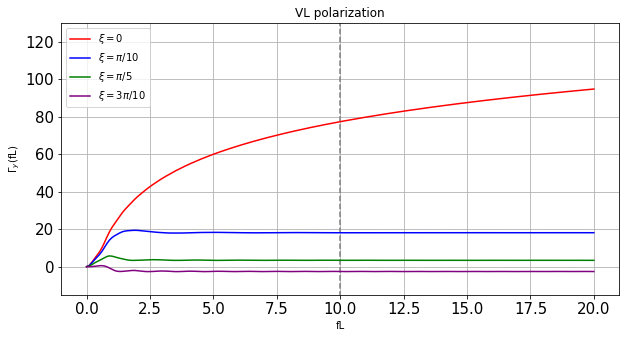

CPU times: user 38min 59s, sys: 108 ms, total: 38min 59s
Wall time: 39min 2s


In [26]:
%%time
fs = np.linspace(0, 20, 200)
Gammas1 = 4*pi/3*np.array([GammaVL(0, 1, 1, f) for f in fs])
Gammas2 = 4*pi/3*np.array([GammaVL(pi/10, 1, 1, f) for f in fs])
Gammas3 = 4*pi/3*np.array([GammaVL(pi/5, 1, 1, f) for f in fs])
Gammas4 = 4*pi/3*np.array([GammaVL(3*pi/10, 1, 1, f) for f in fs])

plt.figure(figsize=(10, 5))
plt.plot(fs, Gammas1, "r", label=r"$\xi=0$")
plt.plot(fs, Gammas2, "b", label=r"$\xi=\pi/10$")
plt.plot(fs, Gammas3, "g", label=r"$\xi=\pi/5$")
plt.plot(fs, Gammas4, "purple", label=r"$\xi=3\pi/10$")
plt.xlabel("fL")
plt.ylabel(r"$\Gamma_y$(fL)")
plt.title("VL polarization")
plt.ylim(-15, 130)
plt.vlines(10, ymin=-1e3, ymax=1e3, linestyles='--', colors='gray')
plt.grid("on")
plt.legend()
plt.show()

## SL (l) Polarization

In [27]:
# @lru_cache(maxsize=None)
def GammaSL0(xi, theta, phi):
    return 3.0/16.0/pi * cos(theta)**2 * sin(theta) * (
        cos(theta)*cos(xi) + cos(phi)*sin(theta)*sin(xi)
    )**2.0 /(1.0 + cos(theta))/(1 + cos(theta)*cos(xi) + cos(phi)*sin(theta)*sin(xi))

%time GammaSL0(xi0, pi/4,  pi/9)

CPU times: user 35 µs, sys: 0 ns, total: 35 µs
Wall time: 37.9 µs


0.005836080605476063

In [28]:
# @lru_cache(maxsize=None)
# @function
def GammaSL(xi, L1, L2, f):
    integral = lambda theta, phi: GammaSL0(xi, theta, phi)*e_factor(xi, L1, L2, f, theta, phi)
    return dblquad(integral, 0.0, 2*pi, 0.0, pi, epsrel=1e-3, epsabs=1e-3)[0]

%time GammaSL(xi0, L10, L20, f0)

CPU times: user 1.85 s, sys: 0 ns, total: 1.85 s
Wall time: 1.85 s


6.866163190861831

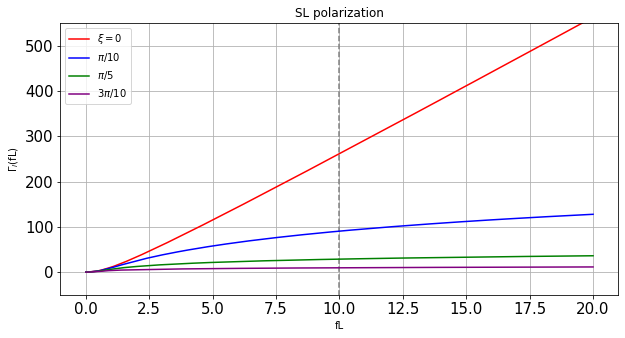

CPU times: user 20min 6s, sys: 157 ms, total: 20min 6s
Wall time: 20min 7s


In [29]:
%%time
fs = np.linspace(0, 20, 200)
Gammas1 = 4*pi/3*np.array([GammaSL(0, 1, 1, f) for f in fs])
Gammas2 = 4*pi/3*np.array([GammaSL(pi/10, 1, 1, f) for f in fs])
Gammas3 = 4*pi/3*np.array([GammaSL(pi/5, 1, 1, f) for f in fs])
Gammas4 = 4*pi/3*np.array([GammaSL(3*pi/10, 1, 1, f) for f in fs])

plt.figure(figsize=(10, 5))
plt.plot(fs, Gammas1, "red", label=r"$\xi=0$")
plt.plot(fs, Gammas2, "b", label=r"$\pi/10$")
plt.plot(fs, Gammas3, "g", label=r"$\pi/5$")
plt.plot(fs, Gammas4, "purple", label=r"$3\pi/10$")
plt.xlabel("fL")
plt.ylabel(r"$\Gamma_l$(fL)")
plt.title("SL polarization")
plt.vlines(10, ymin=-1e3, ymax=1e3, linestyles='--', colors='gray')
plt.ylim(-50, 550)
plt.grid("on")
plt.legend()
plt.show()